#Predikce infarktu myokardu

Cílem úlohy je na základě několika málo atributů určit, jestli člověk prodělal infarkt myokardu. Data set je převzatý a upravený z repozitáře [Kaggle](https://www.kaggle.com/fedesoriano/stroke-prediction-dataset?select=healthcare-dataset-stroke-data.csv). Přestože všechny použité atributy mají na vznik infarktu vliv, úlohu není možné vyřešit příliš přesně. To ji dělá zajímavější. 

Dalším problémem je velká nevyváženost hodnot cílového atributu. Předtím, než začnete problém modelovat, zjistěte, jaké je zastoupení hodnot 0 a 1 u atributu _infarkt_. Diskutujte, na co to má vliv a na co je třeba dávat pozor.

Použité atributy:
* pohlaví - 0: muž, 1: žena, 2: nespecifikováno
* věk
* hypertenze -  zvýšený krevní tlak 0: ne, 1: ano
* nemoc_srdce - 0: neléčí se s žádnou srdeční nemocí, 1: trpí srdeční nemocí
* manzelstvi - 0: nikdy nebyl(a) ženatý/vdaná, 1: byl(a) nebo je ženatý/vdaná
* zamestnani - 0: dite, 1: nikdy nepracoval(a), 2: ve verejnem sektoru, 3: v soukromem sektoru, 4: OSVC
* bydliste - 0: venkov, 1: mesto
* cukr - množství cukru v krvi
* bmi - body mass index, 0 pokud není známo
* koureni - 0: neznamé, 1: nikdy nekouřil(a), 2: přestal(a) kouřit, 3: kouří
* infarkt - 0: nikdy neprodělal(a) infarkt, 1: prodělal(a) infarkt

In [1]:
import pandas as pd

data = pd.read_csv('https://raw.githubusercontent.com/mlcollege/ai-academy/main/07-klasifikace/data/infarkt.csv', index_col='id')
data.head()

,pohlavi,vek,hypertenze,nemoc_srdce,manzelstvi,zamestnani,bydliste,cukr,bmi,koureni,infarkt
id,,,,,,,,,,,
9046,0,67.0,0,1,1,3,1,228.69,36.6,2,1
51676,1,61.0,0,0,1,4,0,202.21,0.0,1,1
31112,0,80.0,0,1,1,3,0,105.92,32.5,1,1
60182,1,49.0,0,0,1,3,1,171.23,34.4,3,1
1665,1,79.0,1,0,1,4,0,174.12,24.0,1,1


## Příprava dat

Nejprve si rozdělíme data na trénovací a testovací část.


In [2]:
from sklearn.model_selection import train_test_split

vstupni_atributy = ['pohlavi', 'vek',	'hypertenze', 'nemoc_srdce', 'manzelstvi', 
                    'zamestnani', 'bydliste', 'cukr', 'bmi', 'koureni']
vystupni_atribut = 'infarkt'

X_train, X_test, y_train, y_test = train_test_split(data[vstupni_atributy], data[vystupni_atribut], test_size=0.3, random_state=4)
print('Velikost trenovaci casti: {}'.format(len(X_train)))
print('Velikost testovaci casti: {}'.format(len(X_test)))

Velikost trenovaci casti: 3577
Velikost testovaci casti: 1533


Nyní zjistíme, jaké je zastoupení obou tříd cílového atributu.

Trénovací data: 
0    3396
1     181
Name: infarkt, dtype: int64

Testovací data: 
0    1465
1      68
Name: infarkt, dtype: int64

Poměry tříd


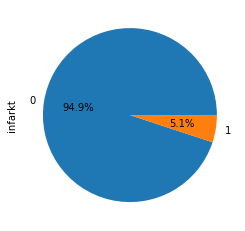

In [3]:
print("Trénovací data: \n{}".format(y_train.value_counts()))
print()
print("Testovací data: \n{}".format(y_test.value_counts()))
print()
y_train.value_counts().plot.pie(autopct='%1.1f%%')
print ('Poměry tříd')

Z analýzy je vidět, že třída 0 (neměl(a) infrakt) je zastoupená výrazně více (94.9 %) než třída 1 (5.1 %). To znamená, že je obtížnější takto málo zastoupenou třídu modelovat. Kromě toho není vhodné používat jako ukazatel úspěšnosti accuracy. Pokud by náš klasifikátor vždy vrátil predikci 0, jeho accuracy by byla 0.949, přestože by takový model nebyl k ničemu. Z toho důvodu jsou mnohem vhodnějšími ukazateli kvality modelu precision a recall. 

## Práce s kategorickými atributy

Některé z atributů jsou takzvaně kategorické (jejich hodnotami jsou kategorie) a nemá smysl je zpracovávat jako číselné atributy. Jedná se o atributy _pohlavi_, _zamestnani_ a _koureni_. Volba číselných označení jejich kategorií byla čistě náhodná a klidně by mohla být úplně jiná. S takovými atributy je správné zacházet jiným způsobem.

Nejčastějším zpracováním kategorických atributů je použití takzvaného [one-hot encoding](https://en.wikipedia.org/wiki/One-hot). Namísto jednoho atributu, který může nabývat například tří hodnot, budeme mít v této reprezentaci 3 atributy, kde je jeden z nich nastaven na 1 a ostatní na 0. Proto se one-hot ecoding někdy do češtiny překládá jako "jeden z n".

Ve ScikitLearn je pro takové zakódování možné použít například [ColumnTransformer](https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html). V něm můžeme specifikovat, které atributy budou standardizované, které budou kódované "one-hot" a které zůstanou beze změny.

#Vytvoření a natrénování modelu

Vykoušejte použít logistickou regresi a náhodné stromy pro klasifikaci. Výsledek vyhodnoťte vhodným ukazatelem úspěšnosti.



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

column_trans = ColumnTransformer(
    [('ohe', OneHotEncoder(categories='auto'),['pohlavi', 'zamestnani', 'koureni']),
     ('std', StandardScaler(), ['vek', 'cukr', 'bmi'])
    ], remainder='passthrough')

model = Pipeline([('trans', column_trans),
                  #('lr', LogisticRegression())])
                  ('rf', RandomForestClassifier(n_estimators=1000))])

model.fit(X_train, y_train)

Pro vyhodnocení modelu je vhodné se dívat na precision, recall a f1-score. Accuracy bude díky nevyváženosti data setu vysoká.

In [5]:
from sklearn import metrics
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)

print ("Celkova spravnost klasifikace pro testovaci data: {:.2f}".format(accuracy_score(y_test, y_pred)))
print ()
print(metrics.classification_report(y_test, y_pred))

Celkova spravnost klasifikace pro testovaci data: 0.95

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1465
           1       0.44      0.06      0.10        68

    accuracy                           0.95      1533
   macro avg       0.70      0.53      0.54      1533
weighted avg       0.94      0.95      0.94      1533



##Významnost jednotlivých atributů

Pro určení významnosti jednotlivých atributů si můžeme v případě lineární regrese vypsat jejich koeficienty. V případě rozhodovacích stromů nabízí ScikitLearn možnost vypsat [feature importance](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier.feature_importances_). Dejte však pozor na ukvapenou interpretaci. Množství trénovacích příkladů je malé a výsledná kvalita predikce nízká.

In [6]:
import numpy as np
feature_names = ['pohlavi_muz', 'pohlavi_zena', 'pohlavi_nespecifikovano',
                 'zamestnani_dite', 'zamestnani_nepracoval', 'zamestnani_verejny_sektor', 'zamestnani_soukromy_sektor', 'zamestnani_osvc',
                 'koureni_nezname', 'koureni_nikdy', 'koureni_prestal', 'koureni_kouri',
                 'vek', 'cukr', 'bmi',
                 'hypertenze', 'nemoc_srdce', 'manzelstvi', 'bydliste']
#importances = model['lr'].coef_[0]
importances = model['rf'].feature_importances_

result = sorted (zip(feature_names, importances), key = lambda x: -np.abs(x[1]))
for k,v in result[:5]:
  print (k,v)

cukr 0.25950372076071954
vek 0.2465920567981289
bmi 0.22310741198364056
bydliste 0.034050079493547776
hypertenze 0.027831939890570166
